In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
selected_cols = 'iyear,imonth,iday,extended,country_txt,region_txt,city,location,summary,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,nkill,nwound'.split(',')
selected_cols

['iyear',
 'imonth',
 'iday',
 'extended',
 'country_txt',
 'region_txt',
 'city',
 'location',
 'summary',
 'success',
 'suicide',
 'attacktype1_txt',
 'targtype1_txt',
 'natlty1_txt',
 'gname',
 'weaptype1_txt',
 'nkill',
 'nwound']

In [3]:
df = pd.read_csv(r'D:/globalterrorism.CSV', usecols=selected_cols, encoding='latin-1')

In [4]:
df

,iyear,imonth,iday,extended,country_txt,region_txt,city,location,summary,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,NaN,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,NaN,NaN,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,NaN,NaN,1,0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,NaN,NaN,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,NaN,NaN,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,0,Armed Assault,Military,Somalia,Al-Shabaab,Firearms,1.0,2.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,0,Bombing/Explosion,Military,Russia,Muslim extremists,Explosives,2.0,7.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0
181689,2017,12,31,0,India,South Asia,Imphal,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,0,0,Bombing/Explosion,Government (General),India,Unknown,Explosives,0.0,0.0


In [5]:
df.rename(columns = {'country_txt':'Country', 'attacktype1_txt':'Attack_type','targtype1_txt':'Target_type','gname':'Group_name','weaptype1_txt':'Weapon_type','nkill':'People_Killed','nwound':'People_wounded','success':'Attack','iyear':'Year','imonth':'Month','iday':'Day','natlty1_txt':'Nationality','region_txt':'Region'}, inplace = True)

In [6]:
df

,Year,Month,Day,extended,Country,Region,city,location,summary,Attack,suicide,Attack_type,Target_type,Nationality,Group_name,Weapon_type,People_Killed,People_wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,NaN,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,NaN,NaN,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,NaN,NaN,1,0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,NaN,NaN,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,NaN,NaN,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,0,Armed Assault,Military,Somalia,Al-Shabaab,Firearms,1.0,2.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,0,Bombing/Explosion,Military,Russia,Muslim extremists,Explosives,2.0,7.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0
181689,2017,12,31,0,India,South Asia,Imphal,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,0,0,Bombing/Explosion,Government (General),India,Unknown,Explosives,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   extended        181691 non-null  int64  
 4   Country         181691 non-null  object 
 5   Region          181691 non-null  object 
 6   city            181257 non-null  object 
 7   location        55495 non-null   object 
 8   summary         115562 non-null  object 
 9   Attack          181691 non-null  int64  
 10  suicide         181691 non-null  int64  
 11  Attack_type     181691 non-null  object 
 12  Target_type     181691 non-null  object 
 13  Nationality     180132 non-null  object 
 14  Group_name      181691 non-null  object 
 15  Weapon_type     181691 non-null  object 
 16  People_Killed   171378 non-null  float64
 17  People_wou

In [8]:
df.describe()

,Year,Month,Day,extended,Attack,suicide,People_Killed,People_wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.889598,0.036507,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.208063,0.313391,0.187549,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000


In [9]:
df['Year'].min(), df['Year'].max()

(1970, 2017)

In [10]:
df['People_Killed'].min(), df['People_Killed'].max()

(0.0, 1570.0)

In [11]:
df['People_wounded'].min(), df['People_wounded'].max()

(0.0, 8191.0)

# Duplicate Rows

In [12]:
df[df.duplicated()]

,Year,Month,Day,extended,Country,Region,city,location,summary,Attack,suicide,Attack_type,Target_type,Nationality,Group_name,Weapon_type,People_Killed,People_wounded
68,1970,2,16,0,United States,North America,Berkeley,NaN,NaN,1,0,Bombing/Explosion,Business,United States,Unknown,Explosives,0.0,0.0
88,1970,2,23,0,United States,North America,South Sioux City,Sioux City/Dakota City area,"2/23/1970: In a series of related attacks, unk...",1,0,Bombing/Explosion,Utilities,United States,Strikers,Explosives,0.0,0.0
89,1970,2,23,0,United States,North America,South Sioux City,Sioux City/Dakota City area,"2/23/1970: In a series of related attacks, unk...",1,0,Bombing/Explosion,Utilities,United States,Strikers,Explosives,0.0,0.0
90,1970,2,23,0,United States,North America,South Sioux City,Sioux City/Dakota City area,"2/23/1970: In a series of related attacks, unk...",1,0,Bombing/Explosion,Utilities,United States,Strikers,Explosives,0.0,0.0
126,1970,3,12,0,United States,North America,New York City,NaN,NaN,1,0,Bombing/Explosion,Business,United States,Revolutionary Force 9,Explosives,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181321,2017,12,15,0,Mali,Sub-Saharan Africa,Unknown,NaN,12/15/2017: Assailants opened fire on a United...,1,0,Armed Assault,Government (Diplomatic),International,High Council for the Unity of Azawad (HCUA),Firearms,0.0,1.0
181397,2017,12,18,0,Pakistan,South Asia,Mangoli,The incident occurred in the Nasirabad district.,12/18/2017: An explosive device detonated near...,1,0,Bombing/Explosion,Utilities,Pakistan,Baloch Republican Army (BRA),Explosives,0.0,0.0
181431,2017,12,20,0,Philippines,Southeast Asia,Tamontaka,The incident occurred in the Datu Odin Sinsuat...,12/20/2017: Assailants threw a grenade at a mi...,1,0,Bombing/Explosion,Military,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Explosives,0.0,0.0
181634,2017,12,29,0,Israel,Middle East & North Africa,Unknown,NaN,12/29/2017: Assailants in Gaza fired a rocket ...,0,0,Bombing/Explosion,Unknown,NaN,Unknown,Explosives,0.0,0.0


In [13]:
new_df = df.drop_duplicates()

# Check for missing Values

In [14]:
 def check_missing(new_df):
    total = new_df.isnull().sum().sort_values(ascending=False)
    percent = new_df.isnull().sum()/181691 * 100
    missing_data = pd.concat([total,percent], axis=1,keys=['Total','Percent'])
    
    return missing_data.head(20)

check_missing(new_df)

,Total,Percent
location,115587,63.617350
summary,57476,31.633928
People_wounded,14999,8.255225
People_Killed,9185,5.055286
Nationality,1440,0.792554
city,434,0.238867
Attack_type,0,0.000000
Weapon_type,0,0.000000
Group_name,0,0.000000
Target_type,0,0.000000


In [15]:
df.head(1)

,Year,Month,Day,extended,Country,Region,city,location,summary,Attack,suicide,Attack_type,Target_type,Nationality,Group_name,Weapon_type,People_Killed,People_wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,NaN,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0


In [16]:
new_df['location'].fillna('Unknown', inplace = True)
new_df['summary'].fillna('No Details', inplace = True)
new_df['People_wounded'].fillna(0, inplace = True)
new_df['People_Killed'].fillna(0, inplace = True)
new_df['Nationality'].fillna('Unknown', inplace = True)
new_df['city'].fillna('Unknown', inplace = True)
new_df

C:\Users\okiad\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Year,Month,Day,extended,Country,Region,city,location,summary,Attack,suicide,Attack_type,Target_type,Nationality,Group_name,Weapon_type,People_Killed,People_wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,Unknown,No Details,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,Unknown,No Details,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,Unknown,No Details,1,0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,Unknown,No Details,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,0.0,0.0
4,1970,1,0,0,Japan,East Asia,Fukouka,Unknown,No Details,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,0,Armed Assault,Military,Somalia,Al-Shabaab,Firearms,1.0,2.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,0,Bombing/Explosion,Military,Russia,Muslim extremists,Explosives,2.0,7.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0
181689,2017,12,31,0,India,South Asia,Imphal,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,0,0,Bombing/Explosion,Government (General),India,Unknown,Explosives,0.0,0.0


In [17]:
new_df.isnull().sum()

Year              0
Month             0
Day               0
extended          0
Country           0
Region            0
city              0
location          0
summary           0
Attack            0
suicide           0
Attack_type       0
Target_type       0
Nationality       0
Group_name        0
Weapon_type       0
People_Killed     0
People_wounded    0
dtype: int64

# Questions

1. Which Country and City has been more vulnerable to attacks?
2. Which year had the most Terrorist attacks?
3. How many attacks were Successfull and Unsuccessful?
4. How many of the attacks were successful?
5. Which Attack Method has been mostly used?
6. Who have been the mostly targeted during Terrorist Attacks and from which country are they?
7. Which is the most gangerous Terrorist group?
8. Weapon used and its effect on people?

# TOP GROUPS 

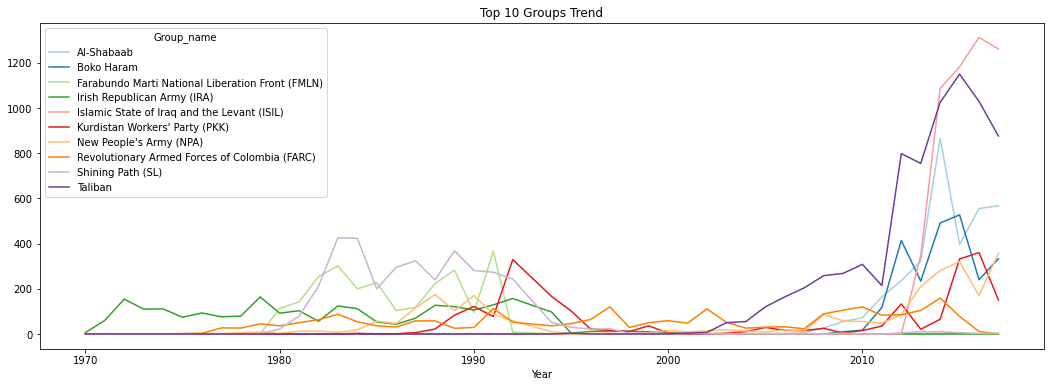

In [18]:
top_groups10 = new_df[new_df['Group_name'].isin(new_df['Group_name'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group_name).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 Groups Trend")
plt.show()

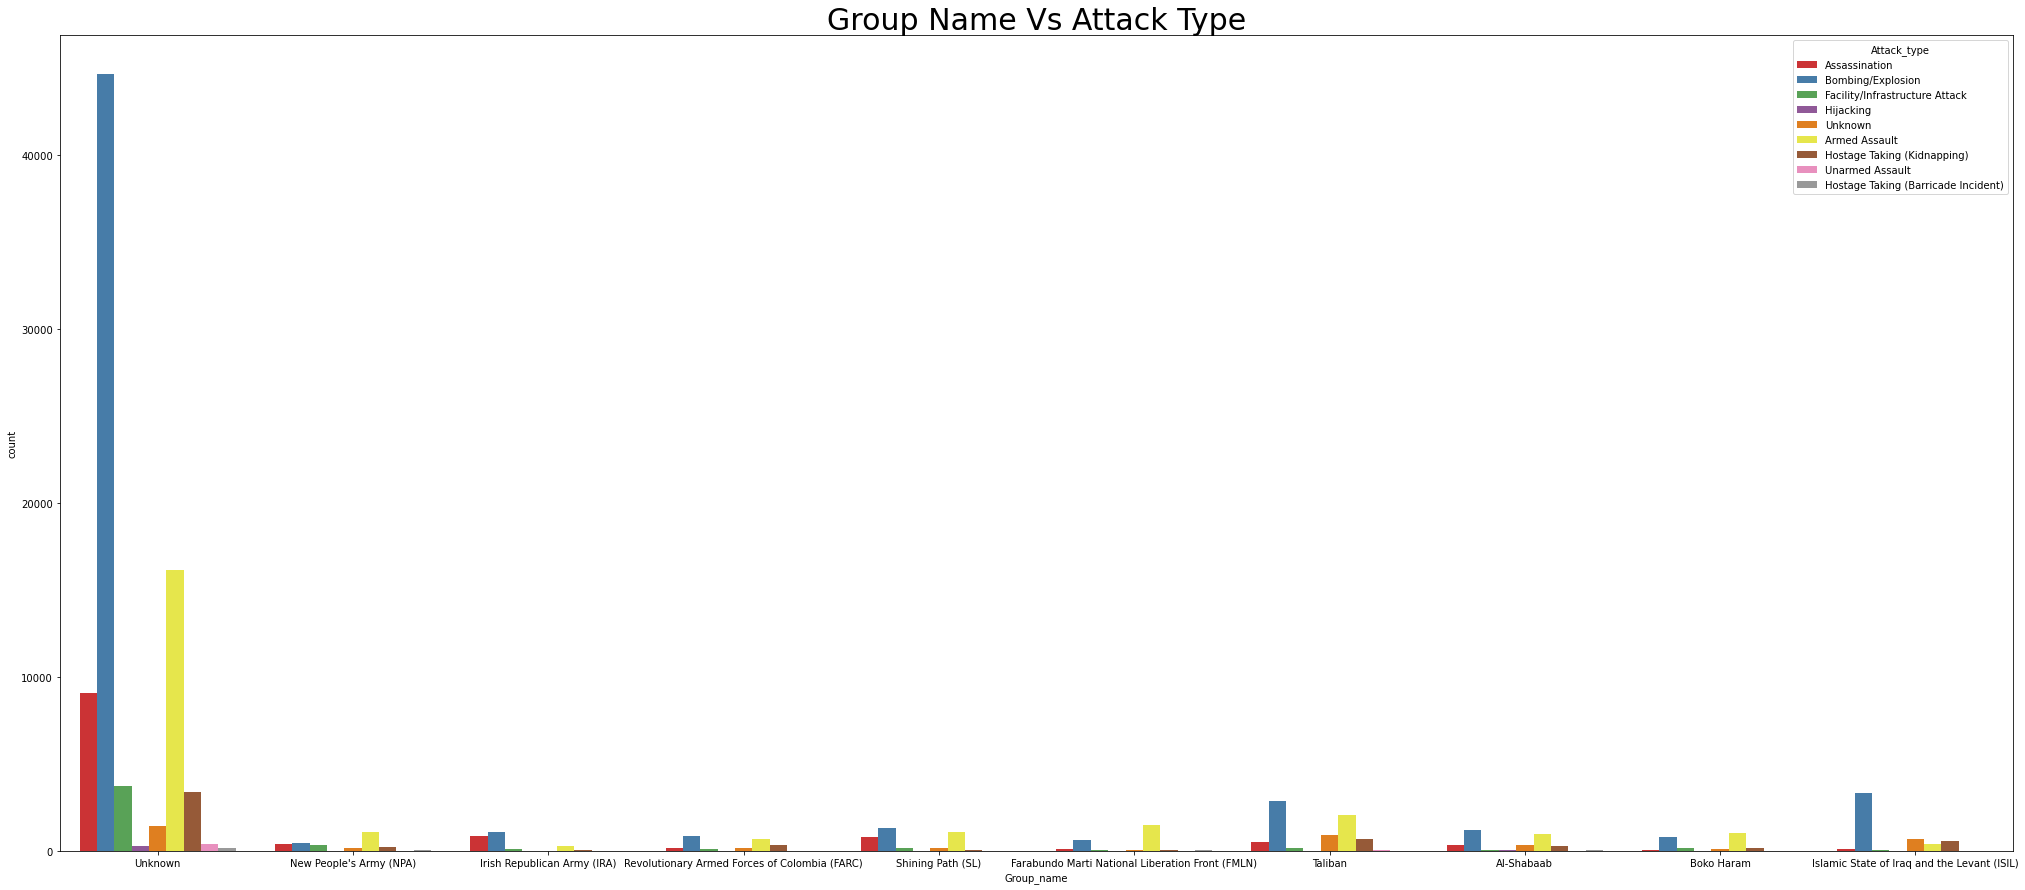

In [19]:
plt.subplots(figsize = (35,15))
Top_10_Groups = new_df['Group_name'].value_counts().index.tolist()[0:10]
snap = new_df[['Group_name','Attack_type']]
Group_name_Attack_Type = snap[snap['Group_name'].isin(Top_10_Groups)]
sns.countplot(x = 'Group_name', hue = 'Attack_type', data = Group_name_Attack_Type, palette = "Set1")
plt.title("Group Name Vs Attack Type", fontsize = 30)
plt.show()

In [20]:
new_df.head(1)

,Year,Month,Day,extended,Country,Region,city,location,summary,Attack,suicide,Attack_type,Target_type,Nationality,Group_name,Weapon_type,People_Killed,People_wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,Unknown,No Details,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64


Text(0.5, 1.0, 'Terrorist Attack Types Operations')

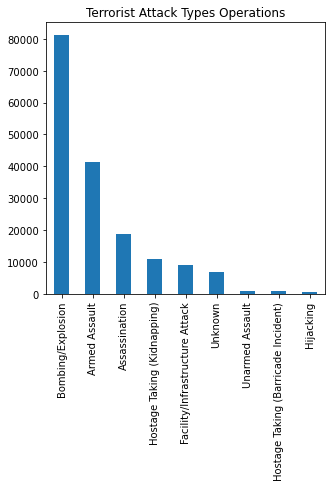

In [21]:
new_df['Attack_type'].value_counts().plot(kind = 'bar', figsize = [5,5])
print(df['Attack_type'].value_counts())
plt.title("Terrorist Attack Types Operations")

In [22]:
# def check_missing(df):
#     total = df.isnull().sum().sort_values(ascending=False)
#     percent = df.isnull().sum()
#     missing_data = pd.concat([total,percent], axis=1,keys=['Total','Percent'])
    
#     return missing_data.head(20)

# check_missing(df)

In [23]:
# def check_duplicate(df):
#     duplicate = df.duplicated()
#     unique_data  = pd.Series(df.shape[0] - duplicate.value_counts()[1])
#     duplicate_data = pd.Series(df.shape[0] - duplicate.value_counts()[0])
#     unique_data_percent = pd.Series((unique_data/df.shape[0])*100)
#     duplicate_data_percent = pd.Series((duplicate_data/df.shape[0])*100)
#     duplicate = pd.concat([unique_data, duplicate_data,unique_data_percent,duplicate_data_percent], axis=1, keys=['Unique Count', 'Duplicate Count','Unique percent','Duplicate Percent'])
    
#     return duplicate

# check_duplicate(df)

In [24]:
# df["target"].fillna("Unknown", inplace = True)
# df["City"].fillna("Unknown", inplace = True) 
# df["Number_of_Killed"].fillna(0, inplace = True)
# df["target_nationality"].fillna("Unknown", inplace=True)
# df["no_of_wound"].fillna(0, inplace=True)

In [25]:
# top_groups10 = df[df['gname']].isin(df['gname'].value_counts()[1:11].index)
# pd.crosstab(top_groups10.Year,top_groups10.gname).plot(color=sns.color_palette('paired', 15))
# fig = plt.gcf()
# fig.set_size_inches(18, 6)
# plt.title("Top 10 Groups Trend")
# plt.show()

In [26]:
# df['suicide'].value_counts().plot(kind = 'bar', figsize = [5,5])
# print(df['suicide'].value_counts())
# plt.title("Suicide Operations")

In [27]:
# df = df[['iyear','imonth','iday','extended','country','country_txt','city','location','summary','success','attacktype1','attacktype1_txt','targtype1','targtype1_txt','gname','weaptype1','weaptype1_txt','nkill','nwound',]]